# Preparation

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

data = pd.read_csv('virusshare.csv', sep=',',skiprows=1, header=None).to_numpy()

X = data[:,1:]
Y = data[:,0]

def testModel(model,modelName):
    kf = KFold(n_splits=5)
    acc_scores = []
    f1_scores = []

    for train_index, test_index in kf.split(X):
        train_X, test_X = X[train_index], X[test_index]
        train_Y, test_Y = Y[train_index], Y[test_index]
        model.fit(train_X,train_Y)
        pred_values = model.predict(test_X)
        acc = accuracy_score(pred_values , test_Y)
        f1 = f1_score(pred_values , test_Y)
        acc_scores.append(acc)
        f1_scores.append(f1)

    avg_acc_score = sum(acc_scores)/5
    avg_f1_score = sum(f1_scores)/5

    print('Method: '+modelName)
    print('accuracy of each fold - {}'.format(acc_scores))
    print('Avg accuracy : {}'.format(avg_acc_score))
    print('f1 of each fold - {}'.format(f1_scores))
    print('Avg f1 : {}'.format(avg_f1_score))
    print('\n')
    return avg_f1_score


# Logistic Regression (Ridge)

In [16]:
from sklearn.linear_model import LogisticRegression
testModel(LogisticRegression(solver = "liblinear", penalty = "l2"),"Ridge logistic regression")

Method: Ridge logistic regression
accuracy of each fold - [0.745, 0.7335, 0.73875, 0.7425, 0.75275]
Avg accuracy : 0.7425
f1 of each fold - [0.7615708274894811, 0.7530120481927711, 0.7476454962569427, 0.7581023954908408, 0.7659171597633138]
Avg f1 : 0.7572495854386698




0.7572495854386698

# Logistic Regression (LASSO)

In [15]:
from sklearn.linear_model import LogisticRegression
testModel(LogisticRegression(solver = "liblinear", penalty = "l1"),"LASSO logistic regression")

Method: LASSO logistic regression
accuracy of each fold - [0.74425, 0.72975, 0.738, 0.74425, 0.7525]
Avg accuracy : 0.7417499999999999
f1 of each fold - [0.7608136544306757, 0.7513227513227512, 0.7463697967086157, 0.7596899224806202, 0.7658467360454116]
Avg f1 : 0.7568085721976148




0.7568085721976148

# Multilayer Perceptron

In [14]:
from sklearn.neural_network import MLPClassifier
testModel(MLPClassifier(solver='sgd', learning_rate = "adaptive", learning_rate_init = 0.1, alpha=1e-5,hidden_layer_sizes=(10, 2), random_state=1,max_iter=500),"multilayer perceptron")

Method: multilayer perceptron
accuracy of each fold - [0.81025, 0.80175, 0.79325, 0.80375, 0.81925]
Avg accuracy : 0.80565
f1 of each fold - [0.8, 0.791918131723957, 0.773113854595336, 0.7975238586535981, 0.8129366106080207]
Avg f1 : 0.7950984911161824




0.7950984911161824

# SVM

In [13]:
from sklearn.svm import LinearSVC
testModel(LinearSVC(penalty = "l1", loss="squared_hinge",dual=False, max_iter = 10000, tol = 0.001),"SVM")

Method: SVM
accuracy of each fold - [0.73825, 0.725, 0.73, 0.73775, 0.7495]
Avg accuracy : 0.7361000000000001
f1 of each fold - [0.7576949780143486, 0.7467771639042357, 0.7416267942583732, 0.757456647398844, 0.7635677206229352]
Avg f1 : 0.7534246608397474




0.7534246608397474

# Decision Tree

In [12]:
from sklearn.tree import DecisionTreeClassifier
testModel(DecisionTreeClassifier(random_state=0),"decision tree")

Method: decision tree
accuracy of each fold - [0.80975, 0.80275, 0.80375, 0.80325, 0.80825]
Avg accuracy : 0.80555
f1 of each fold - [0.8076825878190548, 0.800101342791994, 0.802217183169564, 0.8026084775520442, 0.8098189933052319]
Avg f1 : 0.8044857169275778




0.8044857169275778

# Random Forest

In [11]:
from sklearn.ensemble import RandomForestClassifier
testModel(RandomForestClassifier(max_depth=300, random_state=0),"random forest")

Method: random forest
accuracy of each fold - [0.83425, 0.83525, 0.8355, 0.84075, 0.8385]
Avg accuracy : 0.8368500000000001
f1 of each fold - [0.8329554043839756, 0.83141468406242, 0.8329101066531234, 0.8397484276729558, 0.8385807096451775]
Avg f1 : 0.8351218664835305




0.8351218664835305

# Gaussian Naive Bayes

In [10]:
from sklearn.naive_bayes import GaussianNB
testModel(GaussianNB(),"Gaussian Naive Bayes")

Method: Gaussian Naive Bayes
accuracy of each fold - [0.544, 0.53425, 0.528, 0.56475, 0.5265]
Avg accuracy : 0.5395000000000001
f1 of each fold - [0.2935708752904725, 0.28208092485549136, 0.2555205047318612, 0.3397800530906333, 0.2595777951524629]
Avg f1 : 0.2861060306241842




0.2861060306241842

# k Nearest Neighbors (cosine distance)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
testModel(KNeighborsClassifier(n_neighbors=5, metric="cosine"),"kNN (cosine)")

Method: kNN (cosine)
accuracy of each fold - [0.82675, 0.82325, 0.826, 0.83325, 0.8355]
Avg accuracy : 0.8289500000000001
f1 of each fold - [0.8244236128705347, 0.8195968359275325, 0.8208032955715757, 0.832538287722822, 0.8367245657568239]
Avg f1 : 0.8268173195698576




0.8268173195698576

In [12]:
from sklearn.neighbors import KNeighborsClassifier
testModel(KNeighborsClassifier(n_neighbors=5, weights="distance", metric="cosine"),"kNN (cosine)")

Method: kNN (cosine)
accuracy of each fold - [0.8295, 0.82775, 0.82725, 0.837, 0.83375]
Avg accuracy : 0.83105
f1 of each fold - [0.8311045071817731, 0.8257901390644754, 0.8243964421855147, 0.8365095285857573, 0.8355995055624229]
Avg f1 : 0.8306800245159887




0.8306800245159887

# k Nearest Neighbors (Euclidean distance)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
testModel(KNeighborsClassifier(n_neighbors=5, metric="euclidean"),"kNN (Euclidean)")

Method: kNN (Euclidean)
accuracy of each fold - [0.8235, 0.82025, 0.81925, 0.827, 0.8285]
Avg accuracy : 0.8237
f1 of each fold - [0.8213562753036437, 0.8147384694666324, 0.8153256704980844, 0.8241869918699187, 0.8277247614264189]
Avg f1 : 0.8206664337129397




0.8206664337129397

# Ridge Logistic Regression + AdaBoost

In [7]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
ridge = LogisticRegression(solver = "liblinear",penalty = "l2")
testModel(AdaBoostClassifier(estimator = ridge, n_estimators=30),"ridge + AdaBoost")

Method: ridge + AdaBoost
accuracy of each fold - [0.699, 0.70925, 0.70275, 0.69725, 0.7175]
Avg accuracy : 0.7051499999999999
f1 of each fold - [0.702862783810464, 0.7275708596861091, 0.7008805031446541, 0.7057108140947752, 0.7153652392947104]
Avg f1 : 0.7104780400061426




0.7104780400061426

# Random Forest + AdaBoost

In [6]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=10, random_state=0)
testModel(AdaBoostClassifier(estimator = rf, n_estimators=10),"random forest + AdaBoost")

Method: random forest + AdaBoost
accuracy of each fold - [0.8385, 0.83725, 0.8435, 0.84575, 0.845]
Avg accuracy : 0.842
f1 of each fold - [0.8366211431461811, 0.8325186519166453, 0.8394871794871795, 0.8447798742138364, 0.8441427853192559]
Avg f1 : 0.8395099268166197




0.8395099268166197

# FTRL

In [ ]:
import numpy as np
from datatable import Frame
import pandas as pd
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score


data = pd.read_csv('virusshare.csv', sep=',',skiprows=1, header=None).to_numpy()

X = data[:,1:]
Y = data[:,0]

def testFTRL(model,modelName):
    kf = KFold(n_splits=5)
    acc_scores = []
    f1_scores = []

    for train_index, test_index in kf.split(X):
        train_X, test_X = Frame(X[train_index]), Frame(X[test_index])
        train_Y, test_Y = Frame(Y[train_index]), Frame(Y[test_index])
        model.fit(train_X,train_Y)
        pred_values = model.predict(test_X).to_numpy()
        pred_values = np.rint(pred_values)
        acc = accuracy_score(pred_values, Y[test_index])
        f1 = f1_score(pred_values , Y[test_index])
        acc_scores.append(acc)
        f1_scores.append(f1)

    avg_acc_score = sum(acc_scores)/5
    avg_f1_score = sum(f1_scores)/5

    print('Method: '+modelName)
    print('accuracy of each fold - {}'.format(acc_scores))
    print('Avg accuracy : {}'.format(avg_acc_score))
    print('f1 of each fold - {}'.format(f1_scores))
    print('Avg f1 : {}'.format(avg_f1_score))
from datatable.models import Ftrl
testFTRL(Ftrl(),"FTRL")


Since Jupyter Notebook fails to detect the datatable package, the results are listed in text form.

Method: FTRL

accuracy of each fold - [0.8065, 0.80125, 0.7935, 0.796, 0.80175]

Avg accuracy : 0.7998000000000001

f1 of each fold - [0.7913746630727764, 0.785540868626922, 0.7750544662309369, 0.7807630306286942, 0.8050159822965332]

Avg f1 : 0.7875498021711725

## Dimensionality Reduction (PCA) + Models

In [3]:
import warnings
with warnings.catch_warnings():
    warnings.filterwarnings('ignore')
    from sklearn.linear_model import LogisticRegression
    from sklearn.neural_network import MLPClassifier
    from sklearn.neural_network import MLPClassifier
    from sklearn.svm import LinearSVC
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.naive_bayes import GaussianNB
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.ensemble import AdaBoostClassifier

variation = [0.7, 0.75, 0.8, 0.85, 0.9, 0.95]
avgF1_LR_Ridge=[]
avgF1_LR_LASSO=[]
avgF1_MLP=[]
avgF1_LinearSVC=[]
avgF1_dTree=[]
avgF1_randomForest=[]
avgF1_gaussianNB=[]
avgF1_knn_Cosine=[]
avgF1_knn_Euclidean=[]
avgF1_ada_ridge=[]
avgF1_ada_rf=[]
for i in variation:
    print("\n\nPCA(explained variance={})".format(i))
    fileName_X="X_pca{}.csv".format(i)
    X = pd.read_csv(fileName_X,sep=',',skiprows=1, header=None).to_numpy()
    
    avgF1_LR_Ridge.append(testModel(LogisticRegression(solver = "liblinear", penalty = "l2"),"Ridge logistic regression"))
    avgF1_LR_LASSO.append(testModel(LogisticRegression(solver = "liblinear", penalty = "l1"),"LASSO logistic regression"))
    avgF1_MLP.append(testModel(MLPClassifier(solver='sgd', learning_rate = "adaptive", learning_rate_init = 0.1, alpha=1e-5,hidden_layer_sizes=(10, 2), random_state=1,max_iter=500),"multilayer perceptron"))
    avgF1_LinearSVC.append(testModel(LinearSVC(penalty = "l1", loss="squared_hinge",dual=False, max_iter = 10000, tol = 0.002),"SVM"))
    avgF1_dTree.append(testModel(DecisionTreeClassifier(random_state=0),"decision tree"))
    avgF1_randomForest.append(testModel(RandomForestClassifier(max_depth=300, random_state=0),"random forest"))
    avgF1_gaussianNB.append(testModel(GaussianNB(),"Gaussian Naive Bayes"))
    avgF1_knn_Cosine.append(testModel(KNeighborsClassifier(n_neighbors=5, metric="cosine"),"kNN (cosine)"))
    avgF1_knn_Euclidean.append(testModel(KNeighborsClassifier(n_neighbors=5, metric="euclidean"),"kNN (Euclidean)"))
    
    ridge = LogisticRegression(solver = "liblinear",penalty = "l2")
    avgF1_ada_ridge.append(testModel(AdaBoostClassifier(estimator = ridge, n_estimators=30),"ridge + AdaBoost"))
    rf = RandomForestClassifier(max_depth=10, random_state=0)
    avgF1_ada_rf.append(testModel(AdaBoostClassifier(estimator = rf, n_estimators=10),"random forest + AdaBoost"))
    
print(avgF1_LR_Ridge)
print(avgF1_LR_LASSO)
print(avgF1_MLP)
print(avgF1_LinearSVC)
print(avgF1_dTree)
print(avgF1_randomForest)
print(avgF1_gaussianNB)
print(avgF1_knn_Cosine)
print(avgF1_knn_Euclidean)
print(avgF1_ada_ridge)
print(avgF1_ada_rf)



PCA(explained variance=0.7)
Method: Ridge logistic regression
accuracy of each fold - [0.67475, 0.695, 0.68475, 0.68, 0.685]
Avg accuracy : 0.6839000000000001
f1 of each fold - [0.6882338844955668, 0.7174617878647522, 0.6873295313662288, 0.6842624568327578, 0.6987087517934002]
Avg f1 : 0.6951992824705412


Method: LASSO logistic regression
accuracy of each fold - [0.6755, 0.69525, 0.6835, 0.6805, 0.684]
Avg accuracy : 0.6837500000000001
f1 of each fold - [0.6891762452107278, 0.717497103128621, 0.6872529644268774, 0.685066535239034, 0.6971729755630092]
Avg f1 : 0.6952331647136539


Method: multilayer perceptron
accuracy of each fold - [0.79775, 0.7895, 0.79875, 0.80075, 0.80125]
Avg accuracy : 0.7976
f1 of each fold - [0.7956554685526648, 0.7900249376558603, 0.7943805874840357, 0.8023803620133894, 0.8010012515644556]
Avg f1 : 0.7966885214540811


Method: SVM
accuracy of each fold - [0.68775, 0.686, 0.696, 0.69075, 0.7025]
Avg accuracy : 0.6926
f1 of each fold - [0.7179950327387673, 0.

Method: ridge + AdaBoost
accuracy of each fold - [0.67975, 0.671, 0.6835, 0.682, 0.693]
Avg accuracy : 0.6818500000000001
f1 of each fold - [0.6880934989043096, 0.682738669238187, 0.6874074074074074, 0.6908118619348567, 0.7013618677042802]
Avg f1 : 0.6900826610378082


Method: random forest + AdaBoost
accuracy of each fold - [0.83975, 0.83775, 0.8415, 0.84275, 0.84475]
Avg accuracy : 0.8413
f1 of each fold - [0.8369371661154923, 0.8327750579747487, 0.8374358974358973, 0.8419200804222167, 0.8440873713281447]
Avg f1 : 0.8386311146552998




PCA(explained variance=0.85)
Method: Ridge logistic regression
accuracy of each fold - [0.71725, 0.7195, 0.70675, 0.7105, 0.71675]
Avg accuracy : 0.7141500000000001
f1 of each fold - [0.7229977957384276, 0.7382174521698555, 0.7065298974230673, 0.7156188605108056, 0.7211420132906718]
Avg f1 : 0.7209012038265655


Method: LASSO logistic regression
accuracy of each fold - [0.716, 0.7185, 0.7065, 0.7105, 0.71775]
Avg accuracy : 0.7138500000000001
f1 of ea

Method: kNN (cosine)
accuracy of each fold - [0.82675, 0.82325, 0.826, 0.83325, 0.8355]
Avg accuracy : 0.8289500000000001
f1 of each fold - [0.8244236128705347, 0.8195968359275325, 0.8208032955715757, 0.832538287722822, 0.8367245657568239]
Avg f1 : 0.8268173195698576


Method: kNN (Euclidean)
accuracy of each fold - [0.8235, 0.82025, 0.81925, 0.827, 0.8285]
Avg accuracy : 0.8237
f1 of each fold - [0.8213562753036437, 0.8147384694666324, 0.8153256704980844, 0.8241869918699187, 0.8277247614264189]
Avg f1 : 0.8206664337129397


Method: ridge + AdaBoost
accuracy of each fold - [0.699, 0.70925, 0.70275, 0.69725, 0.7175]
Avg accuracy : 0.7051499999999999
f1 of each fold - [0.702862783810464, 0.7275708596861091, 0.7008805031446541, 0.7057108140947752, 0.7153652392947104]
Avg f1 : 0.7104780400061426


Method: random forest + AdaBoost
accuracy of each fold - [0.8385, 0.84, 0.8435, 0.8435, 0.84475]
Avg accuracy : 0.8420500000000001
f1 of each fold - [0.8365384615384617, 0.8345398138572905, 0.839

In [3]:
from sklearn.neighbors import KNeighborsClassifier
variation=[0.7, 0.75, 0.8, 0.85, 0.9, 0.95,1]
avgF1_knn_cosine_weight=[]
for i in variation:
    print("\n\nPCA(explained variance={})".format(i))
    fileName_X="X_pca{}.csv".format(i)
    if (i!=1):
        X = pd.read_csv(fileName_X,sep=',',skiprows=1, header=None).to_numpy()
    else:
        X=data[:,1:]
    avgF1_knn_cosine_weight.append(testModel(KNeighborsClassifier(n_neighbors=5, weights="distance", metric="cosine"),"kNN (cosine)(weight)"))




PCA(explained variance=0.7)
Method: kNN (cosine)(weight)
accuracy of each fold - [0.83175, 0.827, 0.83075, 0.832, 0.834]
Avg accuracy : 0.8311
f1 of each fold - [0.8280970625798213, 0.8242762823768411, 0.8286509744368514, 0.8320839580209896, 0.836211149481993]
Avg f1 : 0.8298638853792994




PCA(explained variance=0.75)
Method: kNN (cosine)(weight)
accuracy of each fold - [0.836, 0.82175, 0.8265, 0.833, 0.83025]
Avg accuracy : 0.8295000000000001
f1 of each fold - [0.8353413654618475, 0.8188976377952756, 0.8258906171600603, 0.8352244696595954, 0.8316389784279692]
Avg f1 : 0.8293986137009496




PCA(explained variance=0.8)
Method: kNN (cosine)(weight)
accuracy of each fold - [0.82975, 0.824, 0.82375, 0.83125, 0.833]
Avg accuracy : 0.82835
f1 of each fold - [0.8262311814238325, 0.8218623481781375, 0.8226415094339624, 0.830444611906556, 0.8353057199211046]
Avg f1 : 0.8272970741727187




PCA(explained variance=0.85)
Method: kNN (cosine)(weight)
accuracy of each fold - [0.83025, 0.82225, 

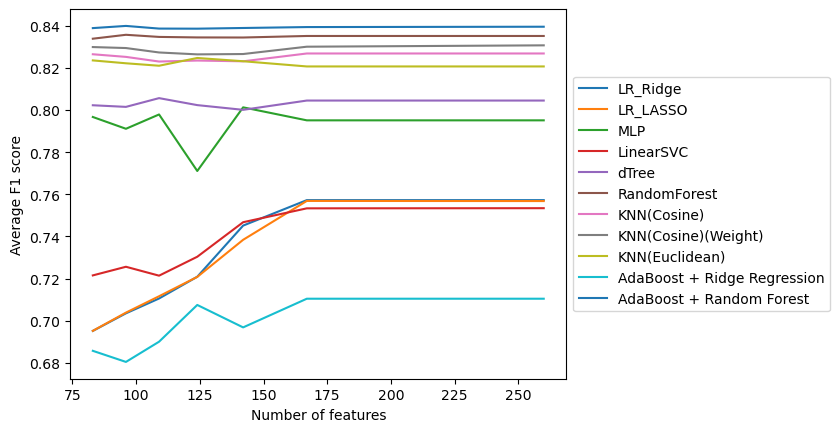

In [13]:
import matplotlib.pyplot as plt

variation = [83, 96, 109, 124, 142, 167, 260]
avgF1_LR_Ridge=[0.6951992824705412, 0.7035430261893261, 0.7105844913040266, 0.7209012038265655, 0.7451652041079635, 0.7572495854386698, 0.757249]
avgF1_LR_LASSO=[0.6952331647136539, 0.7038833444743753, 0.7116500645886811, 0.7208310751365992, 0.7384247557464265, 0.7568668300687994,0.7568085]
avgF1_MLP=[0.7966885214540811, 0.791096426231244, 0.7978830649219292, 0.771074077608233, 0.801264638849229, 0.7950984911161824,0.7950985]
avgF1_LinearSVC=[0.7215371896378666, 0.7256362260736762, 0.7214102300801735, 0.7303883400622391, 0.7467687022751757, 0.7533525541005073,0.75342466]
avgF1_dTree=[0.8022573534869754, 0.8014862110691112, 0.805635662500198, 0.8023235603544764, 0.8000831368041041, 0.8044857169275778,0.80448572]
avgF1_randomForest=[0.8338309901583771, 0.8356837456079742, 0.8346759432240954, 0.8344325114902882, 0.8343940276551141, 0.8351218664835305,0.83512187]
avgF1_gaussianNB=[0.30992472723924036, 0.32308406354198055, 0.30935541534765687, 0.3092272575833327, 0.29286305866679263, 0.2861060306241842,0.286106]
avgF1_knn_Cosine=[0.8264508185263886, 0.8252017672592705, 0.8229956617374137, 0.8234626066081374, 0.8231030750630758, 0.8268173195698576,0.82681732]
avgF1_knn_Euclidean=[0.8235288087502761, 0.8221671190755855, 0.8210060033830755, 0.8246831517842196, 0.8231380510788945, 0.8206664337129397,0.8206643]
avgF1_ada_ridge=[0.68575890711004, 0.6804929187065076, 0.6900826610378082, 0.7075203550440115, 0.6968732483134813, 0.7104780400061426,0.710478]
avgF1_ada_rf=[0.8388569657241414, 0.8398915198483838, 0.8386311146552998, 0.8385853075989538, 0.8389118852848746, 0.8393481569935837,0.8395099]
avgF1_FTRL = [0.5505569104412424,0.5672164727434431,0.5789080416676214,0.5887889355413057,0.6030751322497412,0.6094577697439989,0.7875498]
avgF1_knn_cosine_weight=[0.8298638853792994,0.8293986137009496,0.8272970741727187,0.8263947866569896,0.8265579311369322,0.8300356560704698,0.8306800245159887]

plt.plot(variation, avgF1_LR_Ridge,label="LR_Ridge")
plt.plot(variation, avgF1_LR_LASSO,label="LR_LASSO")
plt.plot(variation, avgF1_MLP,label="MLP")
plt.plot(variation, avgF1_LinearSVC,label="LinearSVC")
plt.plot(variation, avgF1_dTree,label="dTree")
plt.plot(variation, avgF1_randomForest,label="RandomForest")
#plt.plot(variation, avgF1_gaussianNB,label="gaussian NB")
plt.plot(variation, avgF1_knn_Cosine,label="KNN(Cosine)")
plt.plot(variation, avgF1_knn_cosine_weight,label="KNN(Cosine)(Weight)")
plt.plot(variation, avgF1_knn_Euclidean,label="KNN(Euclidean)")
plt.plot(variation, avgF1_ada_ridge,label="AdaBoost + Ridge Regression")
plt.plot(variation, avgF1_ada_rf,label="AdaBoost + Random Forest")
#plt.plot(variation, avgF1_FTRL,label="FTRL")

plt.xlabel('Number of features')
plt.ylabel('Average F1 score')  
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# FTRL on PCA results

ValueError: x and y must have same first dimension, but have shapes (6,) and (7,)

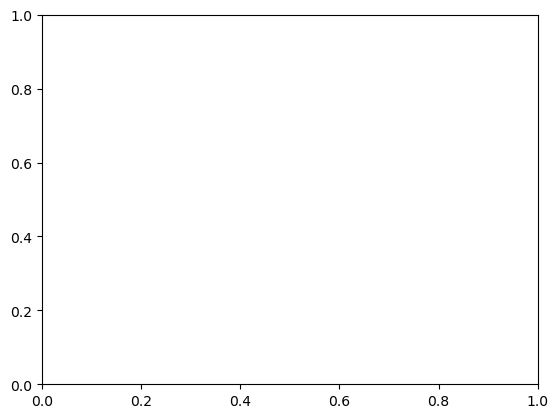

In [3]:
import matplotlib.pyplot as plt
variation = [0.7, 0.75, 0.8, 0.85, 0.9, 0.95,1]
avgF1_FTRL = [0.5505569104412424,0.5672164727434431,0.5789080416676214,0.5887889355413057,0.6030751322497412,0.6094577697439989,0.7875498]
plt.plot(variation, avgF1_FTRL,label="FTRL")
plt.xlabel('Explained variance(PCA)')
plt.ylabel('average F1 score')  
plt.ylim(ymin=0.3,ymax=0.9)
plt.legend()
plt.show()